In [74]:
import numpy as np

In [75]:
import pandas as pd

In [76]:
np.random.seed(42)

In [102]:
apartments =[f"Apt_{i}" for i in range(1,21)]

In [103]:
dates=pd.date_range(start="2025-07-01",periods=30,freq="D")

In [104]:
data = {
    "Date":np.tile(dates,len(apartments)),
    "Apartment":np.repeat(apartments,len(dates)),
    "Electricity_usage":np.random.normal(loc=20,scale=5,size=len(dates)*len(apartments))
}
data

{'Date': array(['2025-07-01T00:00:00.000000000', '2025-07-02T00:00:00.000000000',
        '2025-07-03T00:00:00.000000000', '2025-07-04T00:00:00.000000000',
        '2025-07-05T00:00:00.000000000', '2025-07-06T00:00:00.000000000',
        '2025-07-07T00:00:00.000000000', '2025-07-08T00:00:00.000000000',
        '2025-07-09T00:00:00.000000000', '2025-07-10T00:00:00.000000000',
        '2025-07-11T00:00:00.000000000', '2025-07-12T00:00:00.000000000',
        '2025-07-13T00:00:00.000000000', '2025-07-14T00:00:00.000000000',
        '2025-07-15T00:00:00.000000000', '2025-07-16T00:00:00.000000000',
        '2025-07-17T00:00:00.000000000', '2025-07-18T00:00:00.000000000',
        '2025-07-19T00:00:00.000000000', '2025-07-20T00:00:00.000000000',
        '2025-07-21T00:00:00.000000000', '2025-07-22T00:00:00.000000000',
        '2025-07-23T00:00:00.000000000', '2025-07-24T00:00:00.000000000',
        '2025-07-25T00:00:00.000000000', '2025-07-26T00:00:00.000000000',
        '2025-07-27T00:00:00.0

In [105]:
df = pd.DataFrame(data)

In [106]:
df["Electricity_usage"]=df["Electricity_usage"].round(2)

In [107]:
d


,Date,Apartment,Electricity_usage
0,2025-07-01,Apt_1,23.78
1,2025-07-02,Apt_1,15.39
2,2025-07-03,Apt_1,24.35
3,2025-07-04,Apt_1,26.78
4,2025-07-05,Apt_1,22.07
...,...,...,...
595,2025-07-26,Apt_20,22.20
596,2025-07-27,Apt_20,19.90
597,2025-07-28,Apt_20,22.76
598,2025-07-29,Apt_20,21.12


In [125]:
usage=df.groupby("Apartment")["Electricity_usage"].sum().sort_values(ascending=False)
daily_avg=df.groupby("Date")["Electricity_usage"].mean()
print(daily_avg.head)

<bound method NDFrame.head of Date
2025-07-01    19.4400
2025-07-02    19.5960
2025-07-03    19.0245
2025-07-04    21.8510
2025-07-05    20.1375
2025-07-06    21.3355
2025-07-07    20.2265
2025-07-08    21.8680
2025-07-09    18.7875
2025-07-10    19.8370
2025-07-11    20.7880
2025-07-12    19.3680
2025-07-13    22.0945
2025-07-14    17.3725
2025-07-15    21.5410
2025-07-16    20.5325
2025-07-17    18.0635
2025-07-18    20.9700
2025-07-19    20.2265
2025-07-20    22.4100
2025-07-21    21.2440
2025-07-22    18.6350
2025-07-23    21.2785
2025-07-24    20.3845
2025-07-25    22.0785
2025-07-26    20.2700
2025-07-27    20.7860
2025-07-28    18.9210
2025-07-29    22.3455
2025-07-30    22.1335
Name: Electricity_usage, dtype: float64>


In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
import seaborn as sns

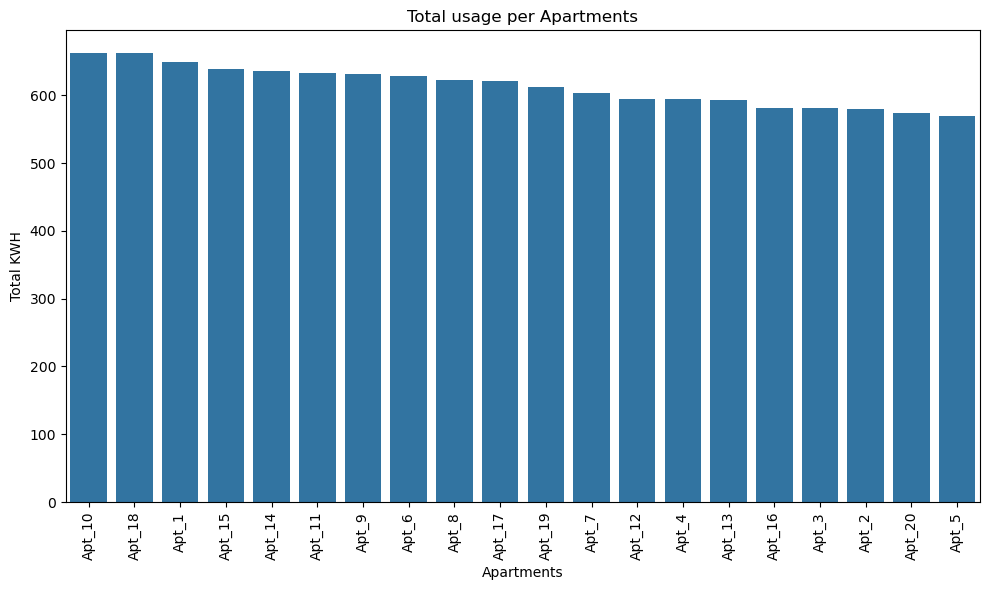

In [129]:
plt.figure(figsize=(10,6))
sns.barplot(x=usage.index, y=usage.values)
plt.xticks(rotation=90)
plt.title("Total usage per Apartments")
plt.xlabel("Apartments")
plt.ylabel("Total KWH")
plt.tight_layout()
plt.show()

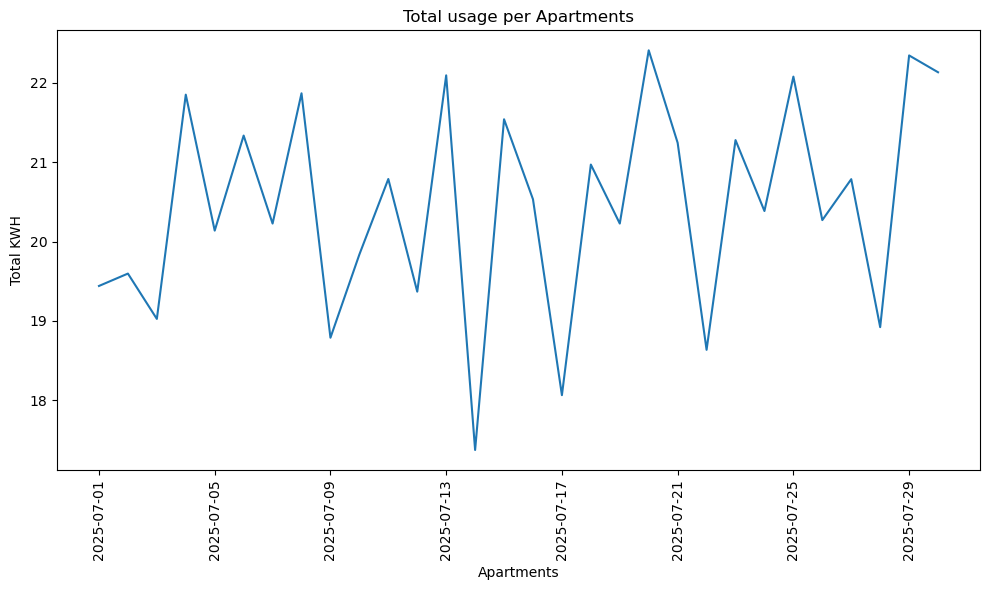

In [132]:
daily_avg = df.groupby("Apartment")["Electricity_usage"].mean()
df["Date"] = pd.to_datetime(df["Date"])
daily_avg = df.groupby("Date")["Electricity_usage"].mean()

plt.figure(figsize=(10,6))
sns.lineplot(x=daily_avg.index, y=daily_avg.values)
plt.xticks(rotation=90)
plt.title("Total usage per Apartments")
plt.xlabel("Apartments")
plt.ylabel("Total KWH")
plt.tight_layout()
plt.show()
